In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from glob import glob

%matplotlib inline

In [4]:
# Directory of spectrograms
data_dir = 'data_images/'

In [5]:
# List contents
os.listdir(data_dir)

['blues', 'metal']

In [8]:
from tensorflow.keras.preprocessing.image import load_img

In [9]:
# Load png files and label them for training
blues = glob(data_dir + 'blues/*')
metal = glob(data_dir + 'metal/*')

data = []
labels = []

for i in blues:   
    image = load_img(i, color_mode='grayscale', 
    target_size = (100,100))
    image = np.array(image)
    data.append(image)
    labels.append(0)
for i in metal:   
    image = load_img(i, color_mode='grayscale', 
    target_size = (100,100))
    image = np.array(image)
    data.append(image)
    labels.append(1)
    
data = np.array(data)
labels = np.array(labels)

In [15]:
data.max()

255

In [19]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,
                                                random_state=42)

In [21]:
# Scale features
X_train = X_train/255
X_test = X_test/255

In [25]:
len(X_train)

10097

In [26]:
len(X_test)

4328

In [27]:
# Reshape with additional feature dimension
X_train = X_train.reshape(len(X_train), 100, 100, 1)
X_test = X_test.reshape(len(X_test), 100, 100, 1)

In [28]:
X_train.shape

(10097, 100, 100, 1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [46]:
# Create CNN model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(100,100,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(100,100,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
# Prevent overfitting
model.add(Dropout(0.5))

# Output
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4333696   
_________________________________________________________________
activation_6 (Activation)    (None, 128)              

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback

In [49]:
# Prevent overfitting
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [50]:
# Train model
model.fit(x=X_train,y=y_train,
          batch_size=32,
          epochs=100,
          validation_data=(X_test,y_test),
          verbose=0,
          callbacks=[early_stop,TqdmCallback(verbose=1)])

In [51]:
losses = pd.DataFrame(model.history.history)

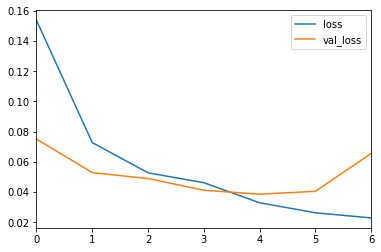

In [52]:
losses[['loss','val_loss']].plot()

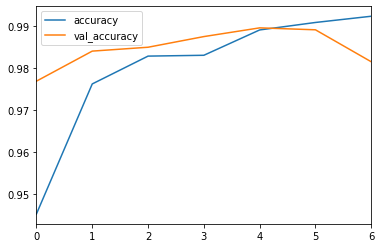

In [53]:
losses[['accuracy','val_accuracy']].plot()

In [56]:
# model.save('CNN_binary__blues_metal_210104.h5')

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
predictions = model.predict_classes(X_test)

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2136
           1       1.00      0.96      0.98      2192

    accuracy                           0.98      4328
   macro avg       0.98      0.98      0.98      4328
weighted avg       0.98      0.98      0.98      4328



In [60]:
confusion_matrix(y_test,predictions)

array([[2133,    3],
       [  77, 2115]], dtype=int64)

In [64]:
# Test example file
num = 2437
random_image = X_test[num]
print( model.predict_classes(random_image.reshape(1,100,100,1))[0] )
print(y_test[num])

[1]
1
